# Artificial Intelligence - Fall 2022 - Laboratory 05 : Uninformed Search


## Introduction

For an _informed search algorithm_ such as **A\***, to find the solution efficiently, the information given by `heuristics` or `path cost` is leveraged to explore through the search space.
However, there are algorithms which traverse the search space without having any prior knowledge - _uninformed search algorithms_.

Furthermore, last laboratory we assumed that the action `a` performed for a particular state `s` always has the same result (a deterministic environment).
In this lab we will be using a non-deterministic environment, in which, starting from the same state `s`, the same action `a` can lead to different results.

Mathematically speaking, in a _blind search problem_ for a particular action `a` in a state `s`, the resulting states are modelled by a `probability distribution`.

\begin{equation*}
SXA \mapsto P(S)
\end{equation*}

## Today's Challenge

In a one-dimensional plane, with only two cells, use a `non-deterministic vacuum cleaner` to move left, right or clean the search space represented as an AND/OR search tree.

To formulate the problem for a deterministic vacuum cleaner, the set of actions includes: _Left, Right, Clean_.
 
For a non-deterministic situation:
* if the vacuum cleaner visits a clean cell, the cell becomes either clean or dirty.
* if the vacuum cleaner visits a dirty cell, the cell becomes clean with a possibility to clean its right neighbour too.


### AND/OR Tree Search

A node of the tree has the following six elements:

- the type of the selected action for a cell (`op` element in the parent node): it can be an `OR` node or an `AND` node;
- the current `state` of the vacuum cleaner 
- the current state of the `env`ironment 
- `children`: a node has a subtree for its representation;
- `parent`: the parent of the node, _None_ if the current node is the root of the tree;
- `tag`: _None_, _Cycle_, _Solved_, _Fail_.

The `class Node` designs the elements of the tree:

In [3]:
class Node:
    allowed_states=('Cycle','Solved','Fail',None)
    def __init__(self, op, state, env, tag=None, children=None):
        # AND / OR type of the node
        self.op = op
        self.state = state
        self.env = env
        self.children = {} if children is None else children
        self.parent = None
        if tag not in Node.allowed_states:
            print('Please select a valid state')
            return
        self.tag=tag
    
    def add_child(self, move, child):
        if child == self:
            return
        self.children[move] = child
        child.parent = self
      
    def __str__(self):
        tag = ''
        if self.tag is not None:
            tag = str(self.tag)
        return str(self.op) + " : " + str(self.state) + " : " + str(self.env) + " (" + str(len(self.children.values())) + ") [" + tag + "]"

d=Node('OR',7,'D')
print(d)

OR : 7 : D (0) []


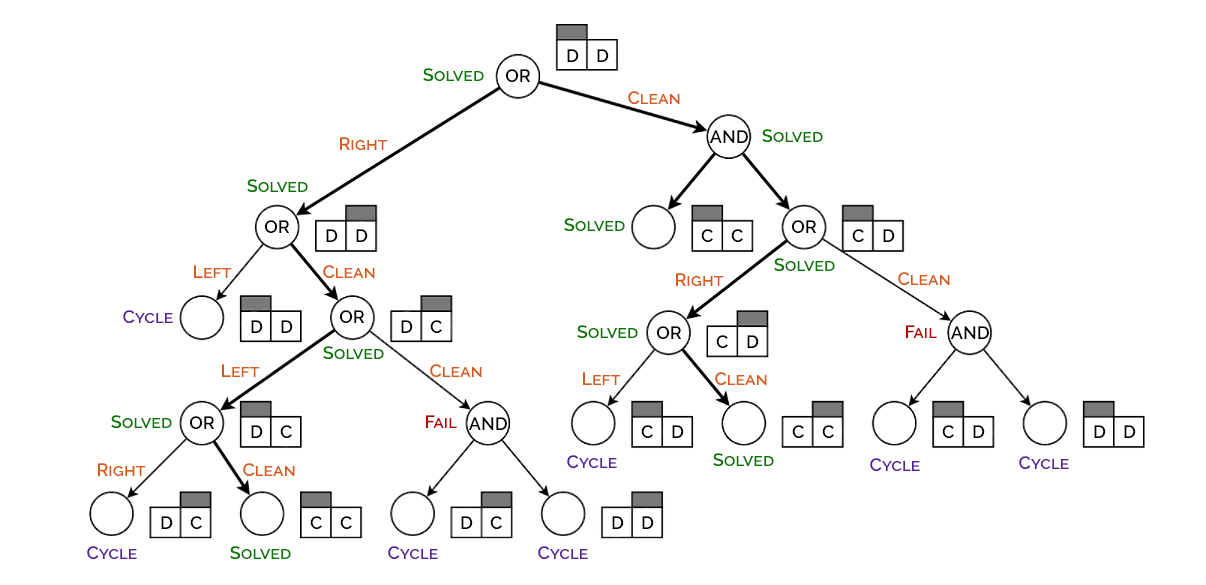

In [1]:
from IPython.core.display import Image, display, HTML
display(Image('https://raw.githubusercontent.com/AlexandraDobrescu/teachingAI/master/images/tree.png', width=800, height=400))

### Task 1

Create a function to automate the process of designing the tree.

Tag variable:
* if the environment is clean, the node becomes _Solved_;
* in the variable `viz_states`, we store the state of the vacuum cleaner and the current state of the environment. If the node was previously visited, the tag changes to _Cycle_;
* if the goal state cannot be reached (and the only results are _Cycles_), the tag is marked as _Fail_.

Tip: you will need a recursive function

In [146]:
def possible_moves(root):
    vacuum=root.state
    env=root.env
    op=root.op

    move1={}
    move2={}

    if vacuum=='L' and env=='DD':
        if op=='OR':
            #move
            move1['op']='OR'
            move1['state']='R'
            move1['env']=env
            move1['move']='Right'
            #clean
            move2['op']='AND'
            move2['state']='L'
            move2['env']=env
            move2['move']='Clean'
        else:
            #Clean 2 cell
            move1['op']='OR'
            move1['state']=vacuum
            move1['env']='CC'
            move1['move']='Clean 2'
            # Clean 1 cell
            move2['op']='OR'
            move2['state']=vacuum
            move2['env']='CD'
            move2['move']='Clean 1'
    elif vacuum =='L' and env=='CD':
        if op=='OR':
            #move
            move1['op']='OR'
            move1['state']='R'
            move1['env']=env
            move1['move']='Right'
            #clean
            move2['op']='AND'
            move2['state']=vacuum
            move2['env']=env
            move2['move']='Clean'
        else:
            # Cell keeps clean
            move1['op']=''
            move1['state']=vacuum
            move1['env']='CD'
            move1['move']='Keeps Clean'
            #Get Dirty the current cell
            move2['op']=''
            move2['state']=vacuum
            move2['env']='DD'
            move2['move']='Dirty'
    elif vacuum == 'L' and env=='DC':
            #Move
            move1['op']='OR'
            move1['state']='R'
            move1['env']=env
            move1['move']='Right'
            #Clean
            move2['op']='OR'
            move2['state']=vacuum
            move2['env']='CC'
            move2['move']=''
    elif vacuum=='R' and env=='DD':
            #move
            move1['op']='OR'
            move1['state']='L'
            move1['env']=env
            move1['move']='Left'
            #clean
            move2['op']='OR'
            move2['state']=vacuum
            move2['env']='DC'
            move2['move']='Clean'
        
    elif vacuum =='R' and env=='CD':
            #move
            move1['op']='OR'
            move1['state']='L'
            move1['env']=env
            move1['move']='Left'
            #clean
            move2['op']='OR'
            move2['state']='R'
            move2['env']='CC'
            move2['move']=''
    elif vacuum == 'R' and env=='DC':
        if op=='OR':
            #Move
            move1['op']='OR'
            move1['state']='L'
            move1['env']=env
            move1['move']='Left'
            #Clean
            move2['op']='AND'
            move2['state']=vacuum
            move2['env']=env
            move2['move']='Clean'
        else:
            #Cell keeps clean
            move1['op']=''
            move1['state']=vacuum
            move1['env']=env
            move1['move']='Keep Clean'
            #Cell get dirty
            move2['op']=''
            move2['state']=vacuum
            move2['env']='DD'
            move2['move']='Dirty'
    
    possible_move=(move1,move2)
    return possible_move

def create_tree(root, viz_states): ## viz_state=[(state,env)]
    
    # Your implementation here

    if root.env=='CC': # Base state
        root.tag='Solved'
        return 
    elif(root.op!='AND') and (root.state,root.env) in viz_states:
        root.tag='Cycle'
        return 
    else:
        
        viz_states.append((root.state,root.env))


        
        branch1,branch2=possible_moves(root) # (op,move,)
        node1=Node(branch1['op'],branch1['state'],branch1['env'])
        
        node2=Node(branch2['op'],branch2['state'],branch2['env'])
        
        root.add_child(branch1['move'],node1)
        root.add_child(branch2['move'],node2)
        
        create_tree(node1,viz_states)
        create_tree(node2,viz_states)
        
        
        
        if 'Solved' in (node1.tag ,node2.tag):
            root.tag='Solved'
        elif 'Cycle'== node1.tag and 'Cycle' == node2.tag:
            root.tag='Fail'

        


In [148]:

root=Node('OR','L','DD')
viz_root=[0]
root.add_child('Clean',Node('AND','L','CC'))
root.children
create_tree(root,viz_root)

print(root.children['Clean'].children['Clean 1'].children['Clean'])




AND : L : CD (2) [Fail]
